<AxesSubplot:xlabel='date'>

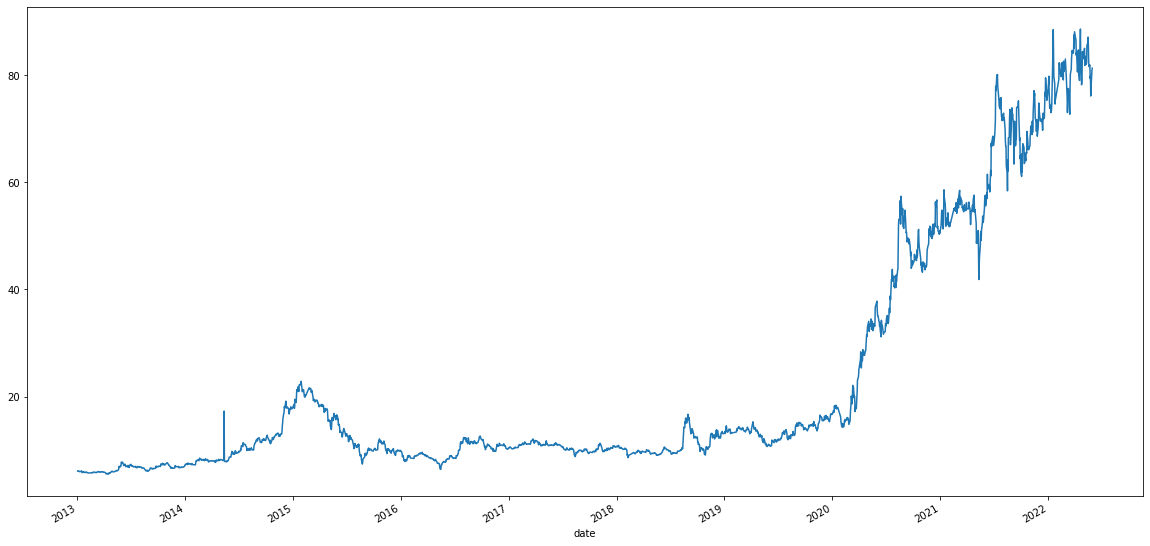

In [64]:
import pandas as pd
import sqlite3
import os
import talib
from talib import abstract
import matplotlib.pyplot as plt


%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',  None)

conn = sqlite3.connect(os.path.join('data','data.db'))
#df = pd.read_sql('select * from price where stock_id = "2368"',conn)
df = pd.read_sql('select stock_id, date, 開盤價, 收盤價, 最高價, 最低價, 成交股數 from price where stock_id="2368"', conn,
                index_col=['date'], parse_dates=['date'])


df.rename(columns = {'開盤價':'open' ,'收盤價':'close' ,'最高價':'high','最低價':'low','成交股數':'volume'},inplace = True )



#PLOT圖
%matplotlib inline
## change the size of plot
#寬度和長度
plt.rcParams["figure.figsize"] = (20,10)

## plot close price
df['close'].plot()




<AxesSubplot:xlabel='date'>

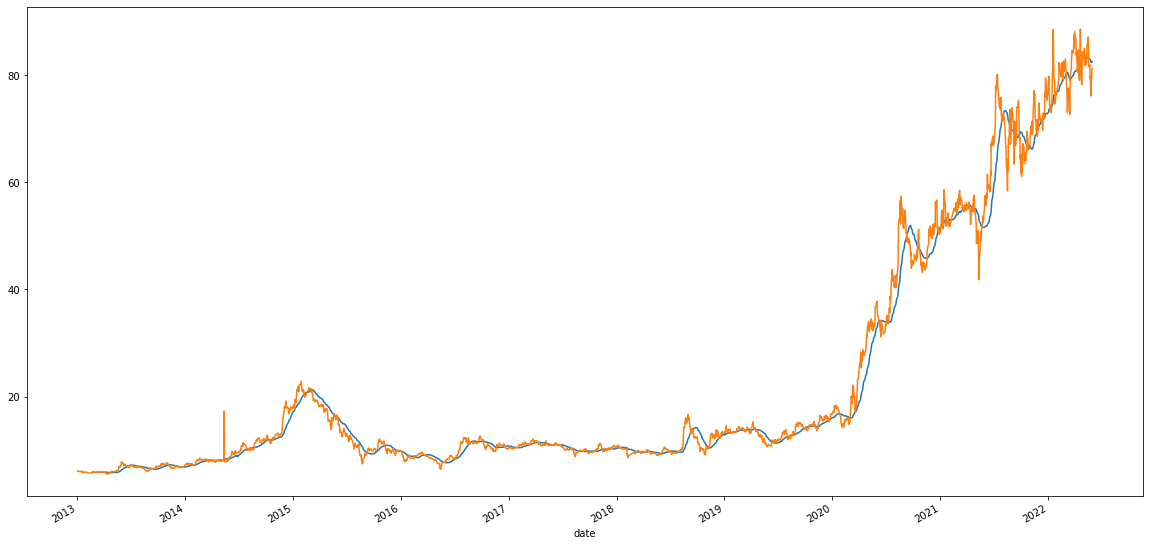

In [65]:
# 畫出均線
abstract.SMA(df).plot()
# 畫出收盤價
df['close'].plot()

/var/folders/nl/wtpbztss01s7qh4c59cl2ppw0000gn/T/ipykernel_42884/453888298.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  abstract.STOCH(df)['2021'].plot()


<AxesSubplot:>

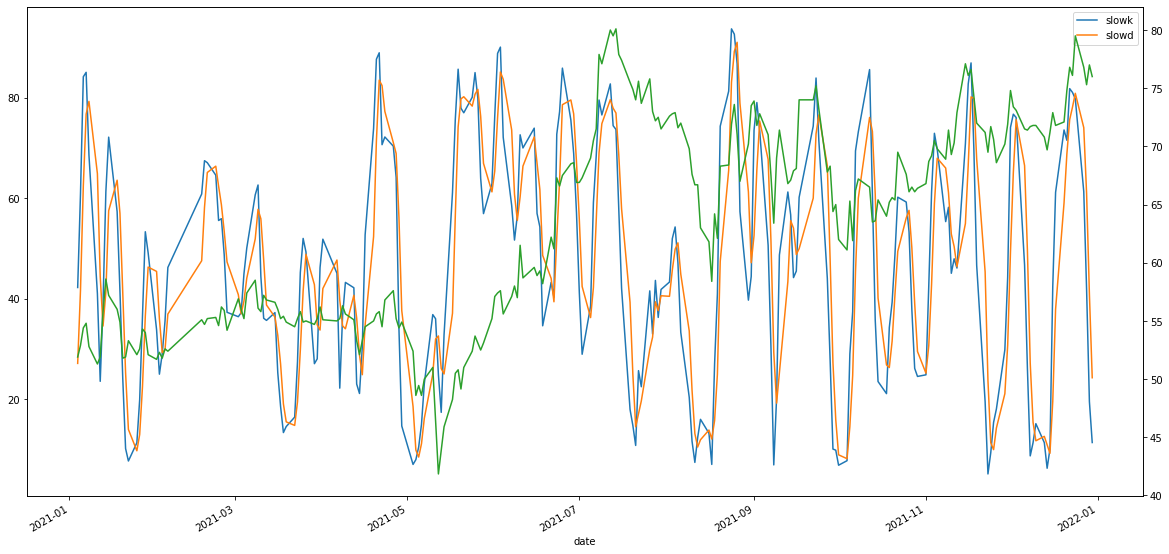

In [71]:

abstract.STOCH(df)['2021'].plot()
df['close']['2021'].plot(secondary_y = True)

{'name': 'BETA', 'group': 'Statistic Functions', 'display_name': 'Beta', 'function_flags': None, 'input_names': OrderedDict([('price0', 'high'), ('price1', 'low')]), 'parameters': OrderedDict([('timeperiod', 5)]), 'output_flags': OrderedDict([('real', ['Line'])]), 'output_names': ['real']}

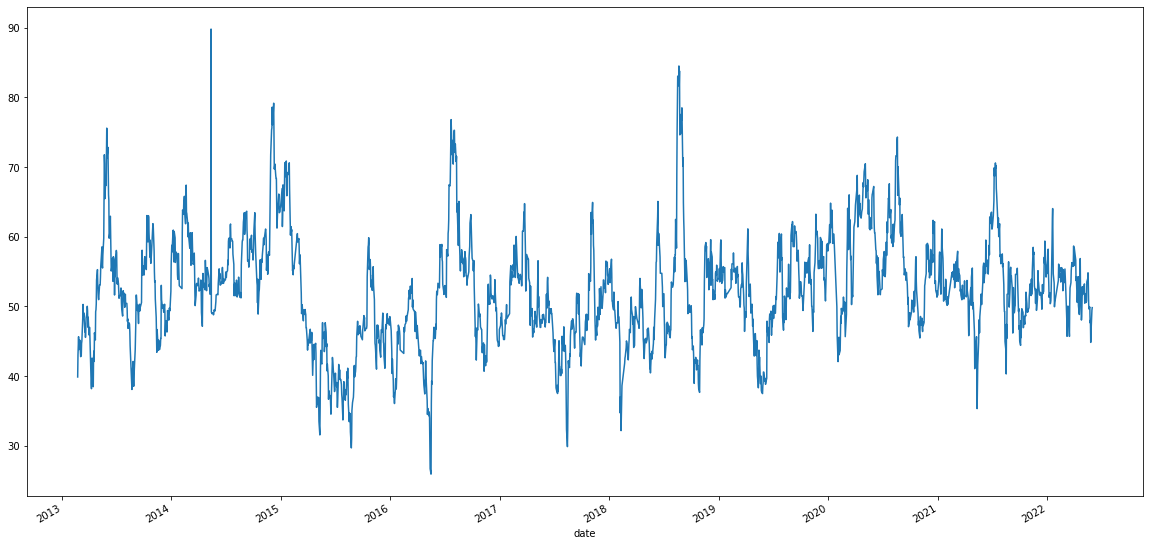

In [84]:
abstract.RSI(df, timeperiod = 30).plot()
abstract.BETA

寫自己的看盤軟體

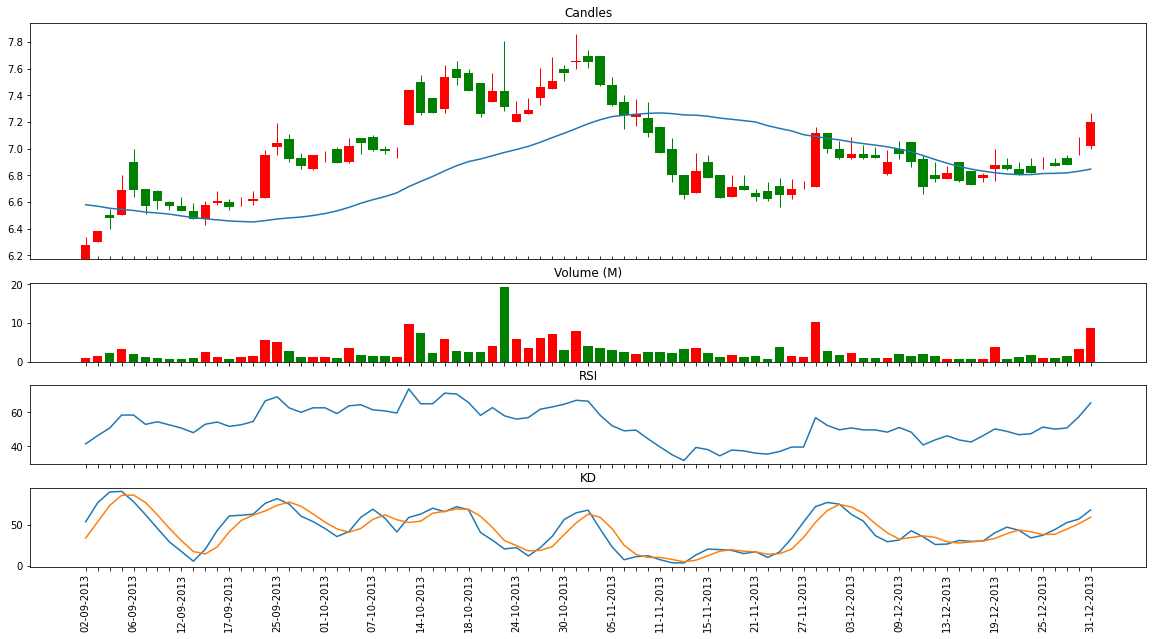

In [89]:
from finlab.plot_candles import plot_candles
SMA = abstract.SMA(df)
RSI = abstract.RSI(df)
STOCH = abstract.STOCH(df)
plot_candles(
             # 起始時間、結束時間
             start_time='2013-09-02',
             end_time='2013-12-31',
             
             # 股票的資料
             pricing=df, 
             title='Candles', 
    
             # 是否畫出成交量？
             volume_bars=True, 
    
             # 將某些指標（如SMA）跟 K 線圖畫在一起
             overlays=[SMA], 
    
             # 將某些指標（如RSI, STOCH）單獨畫在獨立的畫格中
             technicals = [RSI, STOCH],
    
             # 重新命名額外的畫格名稱（跟指標名稱一樣就可以囉！）
             technicals_titles=['RSI', 'KD']
            )